Directories

In [1]:
import os

BASE_DIR = os.getcwd()
MAPS_DIR = os.path.join(BASE_DIR, "..", "mappings")

Imports

In [2]:
from eda import EDA
from region_eda import RegionEDA
from etl import ETLPipeline
from feature_eng import FeatureEngineer

ETL Pipeline

In [3]:
etl = ETLPipeline()

etl.extract("ruchi798/data-science-job-salaries", "ds_salaries.csv")
etl.extract("sazidthe1/data-science-salaries", "data_science_salaries.csv")
etl.extract("arnabchaki/data-science-salaries-2025", "salaries.csv")

etl.transform(
    columns_map=os.path.join(MAPS_DIR, "columns.json"),
    values_map=os.path.join(MAPS_DIR, "values.json"),
)

dataset = etl.load()

Std. custom: 100%|██████████| 3/3 [00:00<00:00, 42.51it/s]


EDA

Missing values or NaNs: 0
Data dimensions (w x h): 52,938 x 11

                    unique_values
salary_in_usd               10537
salary                       9484
job_title                     363
employee_residence             98
company_location               92
salary_currency                27
work_year                       6
experience_level                4
employment_type                 4
work_model                      3
company_size                    3

                    mean        std     min      25%       50%       75%  \
work_year        2024.20       0.76  2020.0   2024.0    2024.0    2025.0   
salary         161954.80  300361.98  4000.0  96600.0  140000.0  193000.0   
salary_in_usd  151657.66   77900.82  2859.0  96500.0  139587.0  191000.0   

                      max  
work_year          2025.0  
salary         30400000.0  
salary_in_usd    800000.0  

                   unique             top   freq
experience_level        4          Senior  27989
employment_

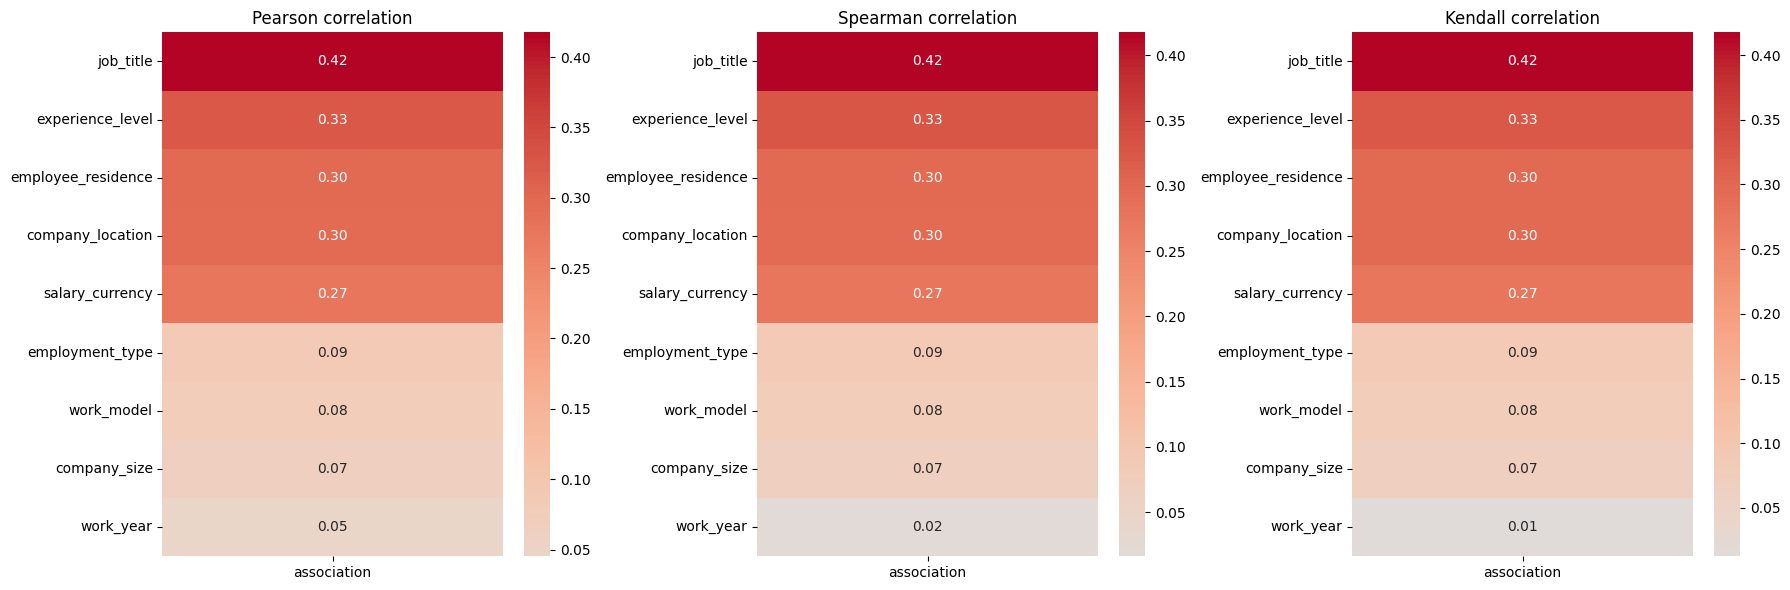

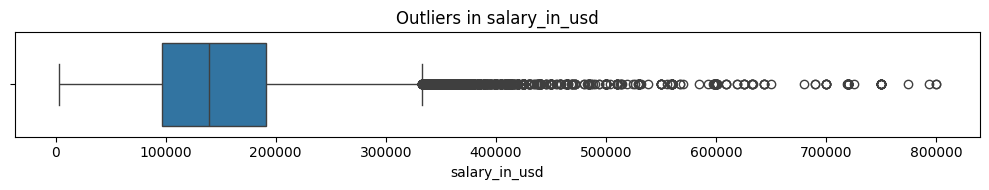

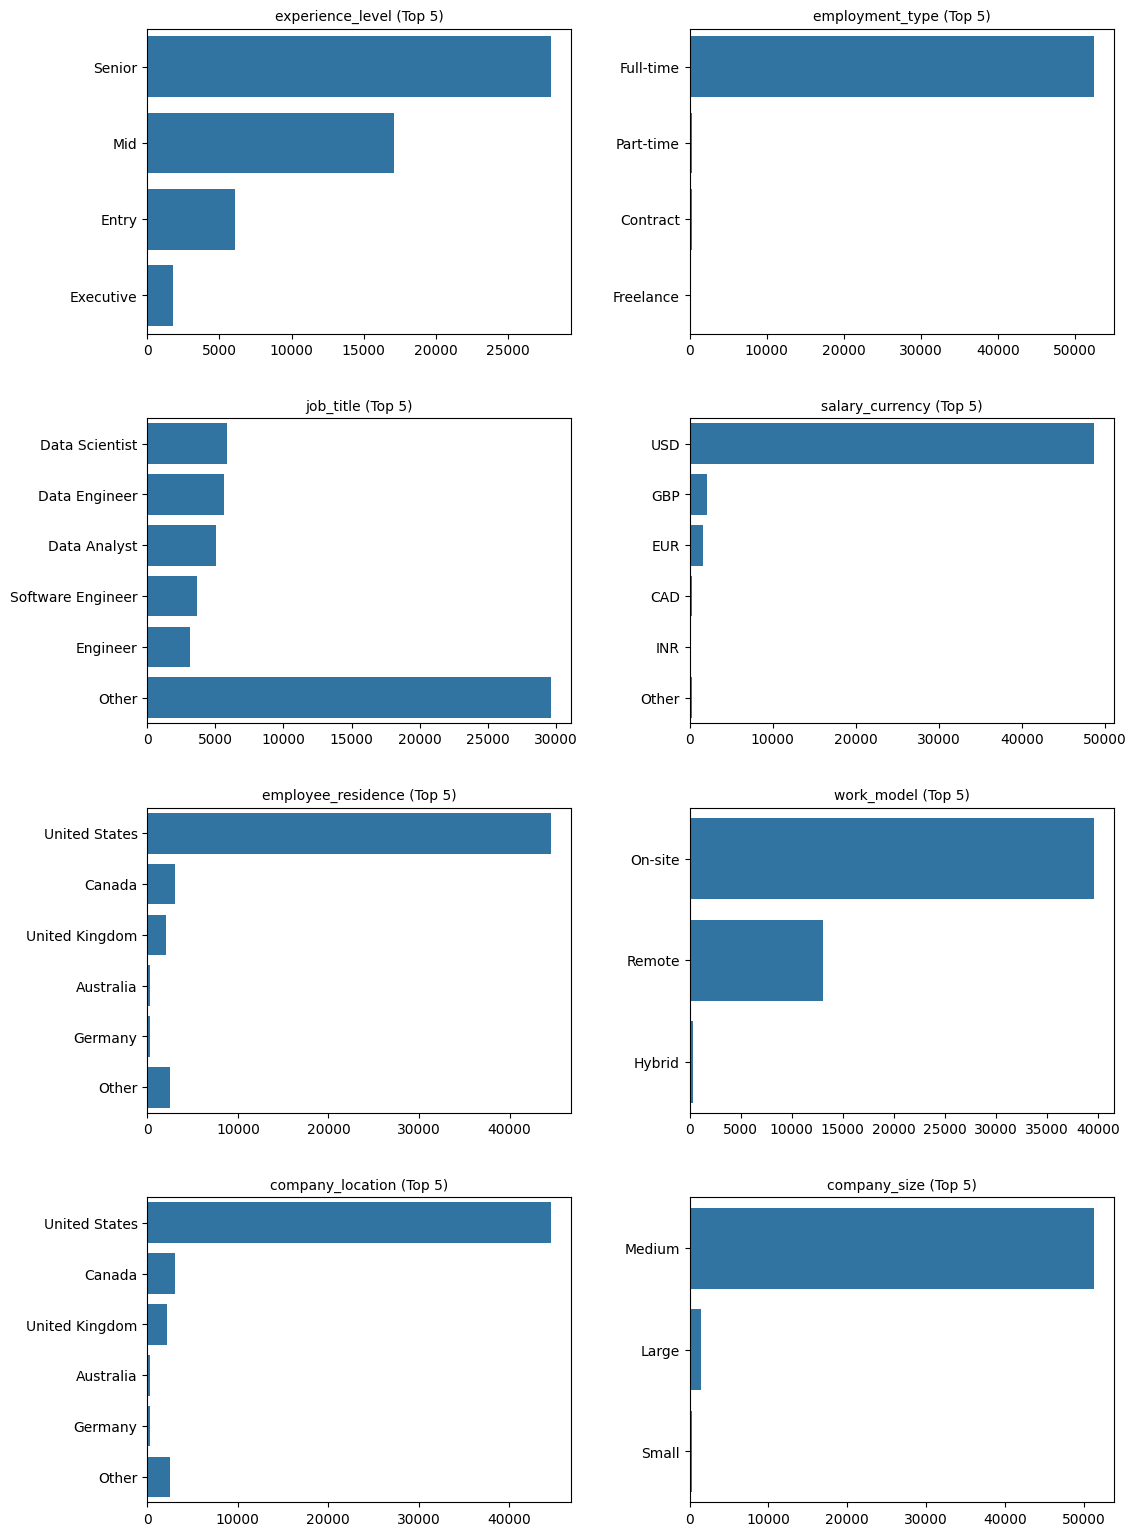

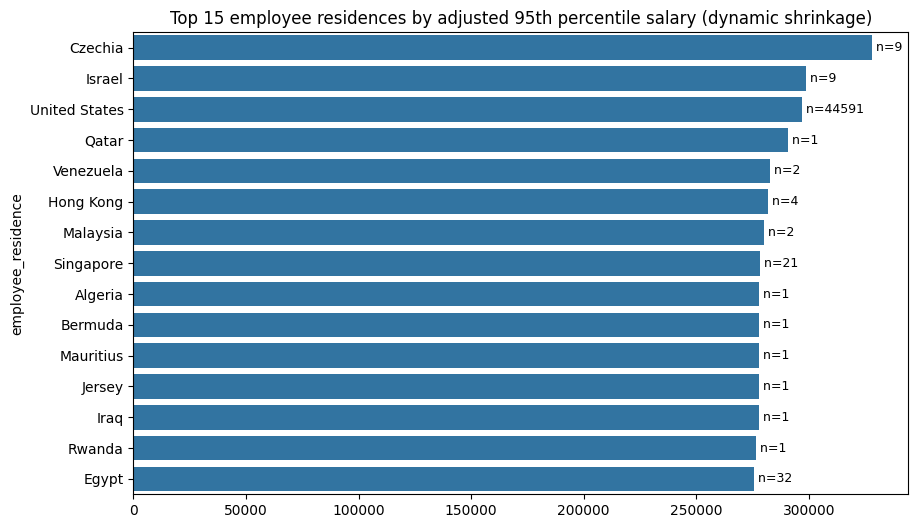

In [4]:
eda = EDA(dataset)
eda.describe()
eda.correlations(target="salary_in_usd", exclude_cols=["salary"])
eda.outliers(exclude_cols=["work_year", "salary"], top_n=5)
eda.geography_salary()

Feature engineering

In [5]:
eng = FeatureEngineer(dataset)
eng.cleanup()
eng.prepare()
eng.cluster_careers(os.path.join(MAPS_DIR, "topics.json"))
eng.print_examples(n = 10)

dataset = eng.dataset

Device set to use cuda:0
Merging synonyms of titles: 100%|██████████| 351/351 [00:00<00:00, 5325.42it/s]


[cache] Loaded from cache/careers_53a5fc98d81b8ae9ff994437590842ac.parquet
Data Engineer                  | p_ai=0.05, p_data=0.95, p_software=0.32, p_academic=0.00
Software Engineer              | p_ai=0.00, p_data=0.37, p_software=0.83, p_academic=0.00
Engineer                       | p_ai=0.68, p_data=0.78, p_software=0.29, p_academic=0.00
Data Architect                 | p_ai=0.00, p_data=0.56, p_software=0.12, p_academic=0.00
Engineer                       | p_ai=0.68, p_data=0.78, p_software=0.29, p_academic=0.00
Developer                      | p_ai=0.00, p_data=0.91, p_software=0.82, p_academic=0.08
AI Engineer                    | p_ai=0.85, p_data=0.71, p_software=0.12, p_academic=0.05
Analytics Specialist           | p_ai=0.01, p_data=0.92, p_software=0.00, p_academic=0.02
Data Analyst                   | p_ai=0.01, p_data=0.95, p_software=0.00, p_academic=0.00
Data Architect                 | p_ai=0.00, p_data=0.56, p_software=0.12, p_academic=0.00


Podział na 2 zbiory

In [ ]:
# ile próbek ma każdy kraj
counts = dataset["employee_residence"].value_counts()

# kraje z min 100 obserwacjami
valid_countries = counts[counts >= 100].index
filtered = dataset[dataset["employee_residence"].isin(valid_countries)].copy()

# przypisz etykiety regionów
filtered["region_group"] = filtered["employee_residence"].apply(
    lambda c: "US+CA+UK" if c in {"United States", "Canada", "United Kingdom"} else "Rest"
)

# podział na regiony
us_ca_uk = filtered[filtered["region_group"] == "US+CA+UK"]
rest = filtered[filtered["region_group"] == "Rest"]

Region-based EDA

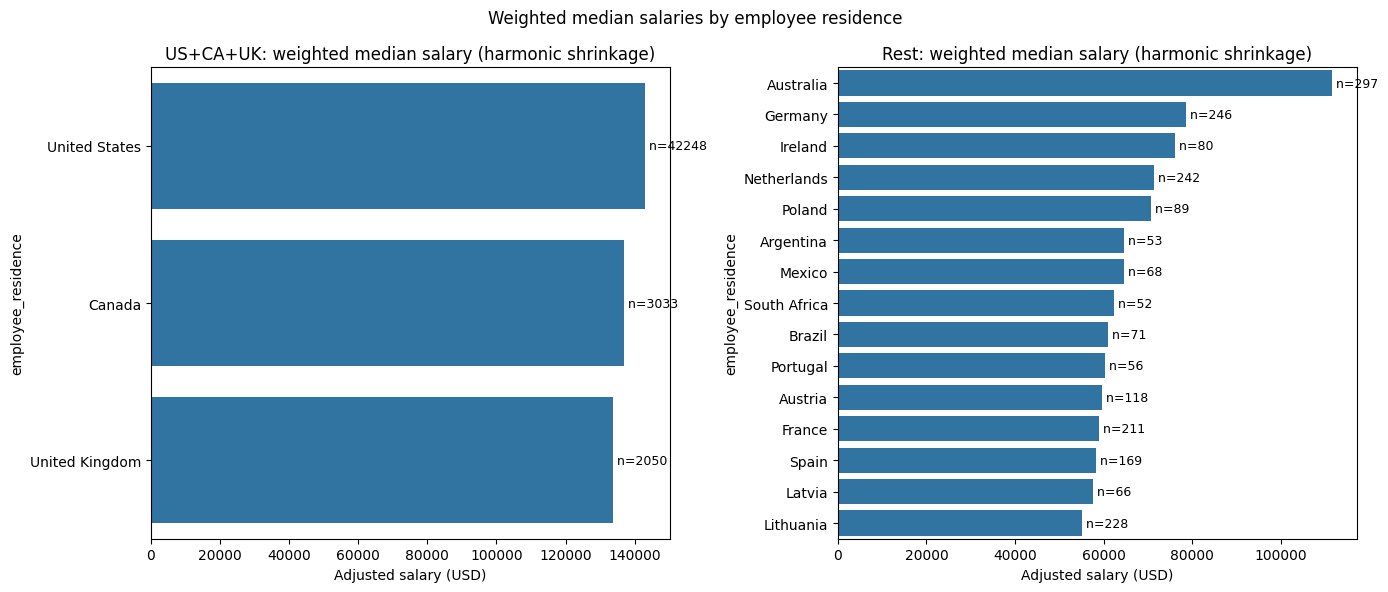

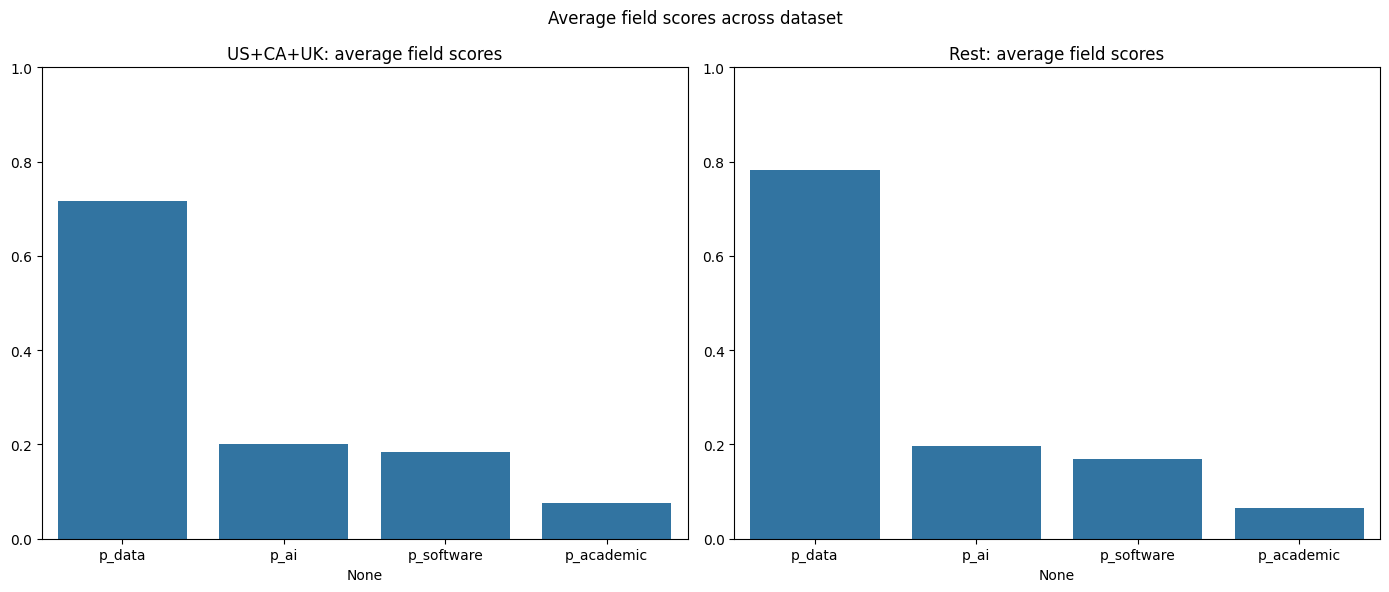

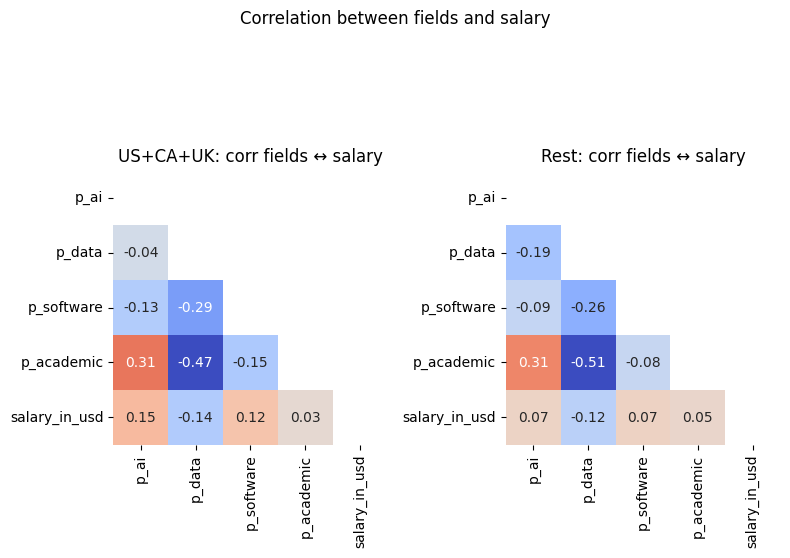

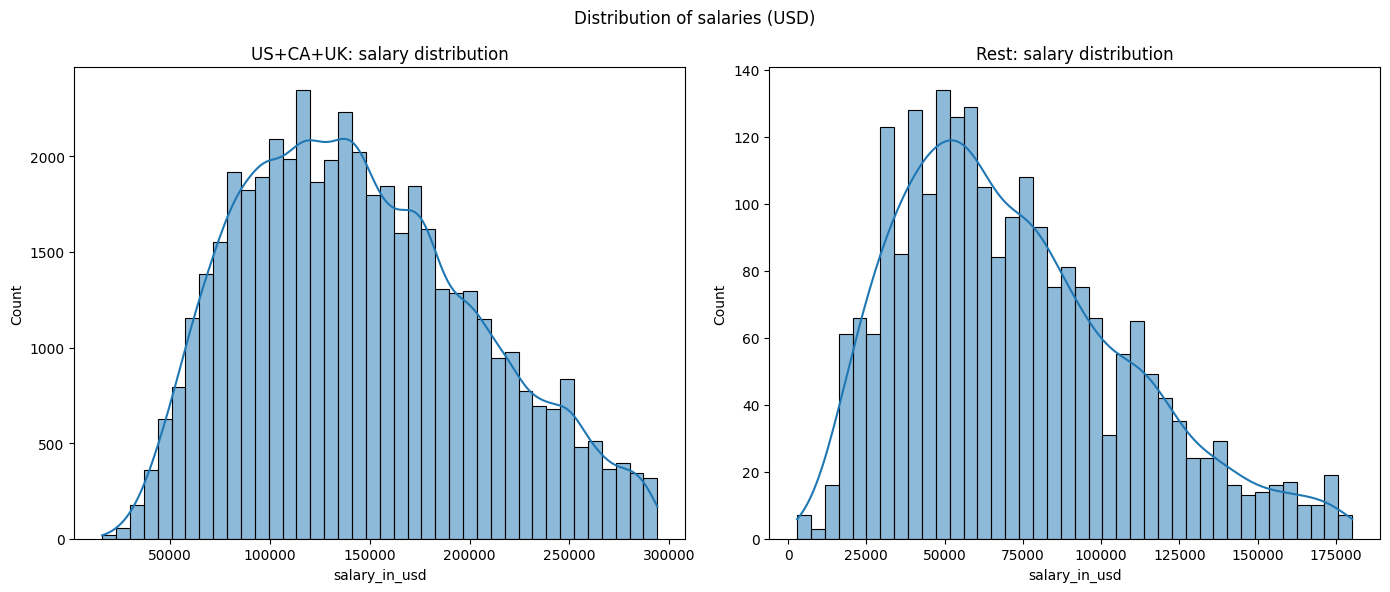

AttributeError: 'tuple' object has no attribute 'values'

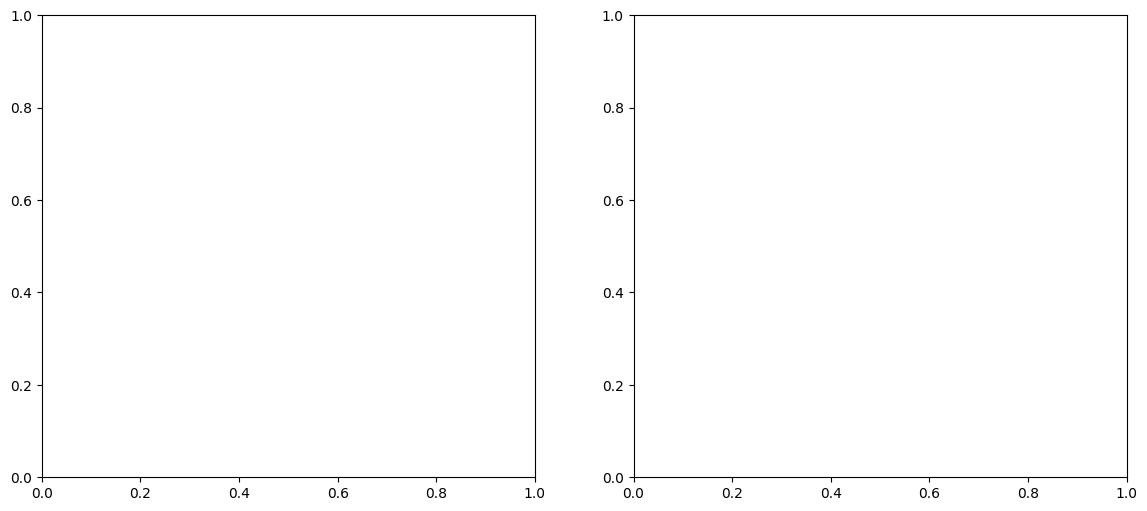

In [7]:
report_eda = RegionEDA(us_ca_uk, rest, os.path.join(MAPS_DIR, "orders.json"))

report_eda.geography_salary()
report_eda.field_profiles()
report_eda.salary_distributions()
report_eda.salary_trends()
report_eda.salary_vs_company_size()
report_eda.salary_vs_work_model()